In [1]:
import pandas as pd
import numpy as np
import random
from itertools import permutations
from collections import Counter
import matplotlib.pyplot as plt

### Creating the transition matrix

In [2]:
def apply_floyd_warshall(df):
    n_nodes = len(df)
    for k in range(n_nodes):
        for i in range(n_nodes):
            for j in range(n_nodes):
                if df.iloc[i, j] > df.iloc[i, k] + df.iloc[k, j]:
                    df.iloc[i, j] = df.iloc[i, k] + df.iloc[k, j]
                    df.iloc[j, i] = df.iloc[i, j]
    return df

# starting matrix with edge weights
nodes = ['Bhubaneshwar Airport', 'Lingraj Temple', 'Mukteshwar temple', 'Raja Rani temple', 'Shanthi Stupa', 'Tribal museum', 'Udhayagiri & Kandhagiri']
dist_dict = {
    'Bhubaneshwar Airport': { 'Lingraj Temple': 30, 'Udhayagiri & Kandhagiri': 48},
    'Lingraj Temple': { 'Shanthi Stupa': 25, 'Mukteshwar temple': 5, 'Udhayagiri & Kandhagiri': 28, 'Bhubaneshwar Airport': 30},
    'Shanthi Stupa': { 'Lingraj Temple': 25, 'Mukteshwar temple': 45, 'Tribal museum': 50},
    'Mukteshwar temple': { 'Lingraj Temple': 5, 'Shanthi Stupa': 45, 'Tribal museum': 15, 'Raja Rani temple': 20, 'Udhayagiri & Kandhagiri': 22},
    'Tribal museum': { 'Shanthi Stupa': 50, 'Mukteshwar temple': 15},
    'Udhayagiri & Kandhagiri': { 'Bhubaneshwar Airport': 48, 'Lingraj Temple': 28, 'Mukteshwar temple': 22, 'Raja Rani temple': 18},
    'Raja Rani temple': { 'Mukteshwar temple': 20, 'Udhayagiri & Kandhagiri': 18}
}
# adding self loops, zero distance
for key in dist_dict.keys():
    dist_dict[key][key] = 0

dist_df = pd.DataFrame(dist_dict, columns=nodes, index=nodes).fillna(np.inf)
dist_df = apply_floyd_warshall(dist_df)
dist_df

,Bhubaneshwar Airport,Lingraj Temple,Mukteshwar temple,Raja Rani temple,Shanthi Stupa,Tribal museum,Udhayagiri & Kandhagiri
Bhubaneshwar Airport,0.0,30.0,35.0,55.0,55.0,50.0,48.0
Lingraj Temple,30.0,0.0,5.0,25.0,25.0,20.0,27.0
Mukteshwar temple,35.0,5.0,0.0,20.0,30.0,15.0,22.0
Raja Rani temple,55.0,25.0,20.0,0.0,50.0,35.0,18.0
Shanthi Stupa,55.0,25.0,30.0,50.0,0.0,45.0,52.0
Tribal museum,50.0,20.0,15.0,35.0,45.0,0.0,37.0
Udhayagiri & Kandhagiri,48.0,27.0,22.0,18.0,52.0,37.0,0.0


### Running (simplified) Genetic Algorithm for TSP

In [3]:
def calculate_fitness(order):
    fitness = 0
    for i in range(len(order)):
        fitness += dist_df.iloc[order[i], order[(i+1)% len(order)]]
    return 1 / fitness

In [4]:
# Structure of chromosome

# chromosome structure will be like:
order = np.random.permutation(np.arange(7))
chr1 = {
    'order': order,
    'fitness': calculate_fitness(order),
}
chr1

{'order': array([6, 0, 5, 4, 3, 1, 2]), 'fitness': 0.004081632653061225}

In [5]:
population = []
for i in range(10):
    order = np.random.permutation(np.arange(7))
    population.append({
        'order': order,
        'fitness': calculate_fitness(order)
    })

population = sorted(population, key=lambda x: x['fitness'], reverse=True)

In [6]:
def mutation(p, p_m = 0.1):
    # simple swap mutation, swaps two cities in the order
    order = p['order'].copy()
    if random.random() < p_m:
        i = random.randint(0, len(order) - 1)
        j = random.randint(0, len(order) - 1)
        order[i], order[j] = order[j], order[i]
    return {'order': order, 'fitness': calculate_fitness(order)}

In [7]:
for i in range(1000):
    # Select the top 5 individuals to mutate, mutate them, and add them to the population
    to_mutate = population[:5]
    mutated = [mutation(x) for x in to_mutate]
    population = population + mutated
    # Select the top 10 individuals, and discard the rest
    population = sorted(population, key=lambda x: x['fitness'], reverse=True)
    population = population[:10]
    # Print the best individual every 100 iterations
    if i % 100 == 0:
        print(population[0], 1 / population[0]['fitness'])

{'order': array([6, 4, 0, 1, 2, 5, 3]), 'fitness': 0.004761904761904762} 209.99999999999997
{'order': array([6, 0, 4, 1, 2, 5, 3]), 'fitness': 0.004975124378109453} 201.0
{'order': array([6, 0, 4, 1, 2, 5, 3]), 'fitness': 0.004975124378109453} 201.0
{'order': array([6, 0, 4, 1, 2, 5, 3]), 'fitness': 0.004975124378109453} 201.0
{'order': array([6, 0, 4, 1, 2, 5, 3]), 'fitness': 0.004975124378109453} 201.0
{'order': array([6, 0, 4, 1, 2, 5, 3]), 'fitness': 0.004975124378109453} 201.0
{'order': array([6, 0, 4, 1, 2, 5, 3]), 'fitness': 0.004975124378109453} 201.0
{'order': array([6, 0, 4, 1, 2, 5, 3]), 'fitness': 0.004975124378109453} 201.0
{'order': array([6, 0, 4, 1, 2, 5, 3]), 'fitness': 0.004975124378109453} 201.0
{'order': array([6, 0, 4, 1, 2, 5, 3]), 'fitness': 0.004975124378109453} 201.0


In [8]:
# rotate the order of the cities in the path until Bhuwaneswar Airport is the first location in the path
order = list(population[0]['order'])
while order[0] != 0:
    order = order[1:] + [order[0]]

print(order)

path = [nodes[i] for i in order] + [nodes[order[0]]]
print(' > '.join(path))
distances = [dist_df.loc[path[i], path[i+1]] for i in range(len(path)-1)]
print('Distances: ', distances)
print('Total distance: ', sum(distances))

[0, 4, 1, 2, 5, 3, 6]
Bhubaneshwar Airport > Shanthi Stupa > Lingraj Temple > Mukteshwar temple > Tribal museum > Raja Rani temple > Udhayagiri & Kandhagiri > Bhubaneshwar Airport
Distances:  [55.0, 25.0, 5.0, 15.0, 35.0, 18.0, 48.0]
Total distance:  201.0


### Verifying the answer is correct

In [9]:
# generating all the permutations of 7 cities, and finding the best one
permutations = list(permutations(range(7)))

max_fitness = 0
best_perm = None
for perm in permutations:
    fit = calculate_fitness(perm)
    if fit > max_fitness:
        max_fitness = fit
        best_perm = perm

print(best_perm, 1/max_fitness)

(0, 1, 4, 2, 5, 3, 6) 201.0


### Verifying the solution is easy to get to

You have a 1.11% chance of getting the best path while generating random paths.


Text(0, 0.5, 'Frequency')

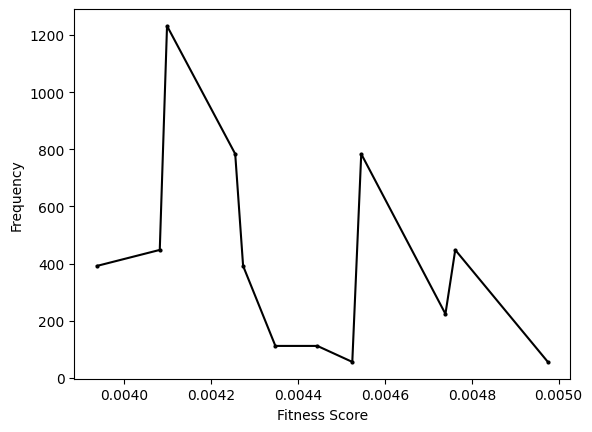

In [10]:
fitness_scores = [calculate_fitness(perm) for perm in permutations]

counter = dict(Counter(fitness_scores))
xs, ys = zip(*sorted(counter.items()))

print(f"You have a {ys[-1] / sum(ys):.2%} chance of getting the best path while generating random paths.")

plt.plot(xs, ys, 'o-', color='black', markersize=2)
plt.xlabel("Fitness Score")
plt.ylabel("Frequency")